# ISD - TP 3 - Analyse des données socio-économiques

## Groupe: Anatole Roy - Timothée Van Hove


### Exercice 1

Commencez par importer le module gapminder avec pip. Une fois installé ce module, vous aurez accès à un dataframe appelé gapminder. Utilisez les méthodes head(), describe() et info() pour vous familiariser.

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from gapminder import gapminder as gm

In [24]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [25]:
gm.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [26]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### Exercice 2

Utilisez la commande pandas.DataFrame.hist(gapminder) pour vous faire une idée plus précise des valeurs dans la base de données.

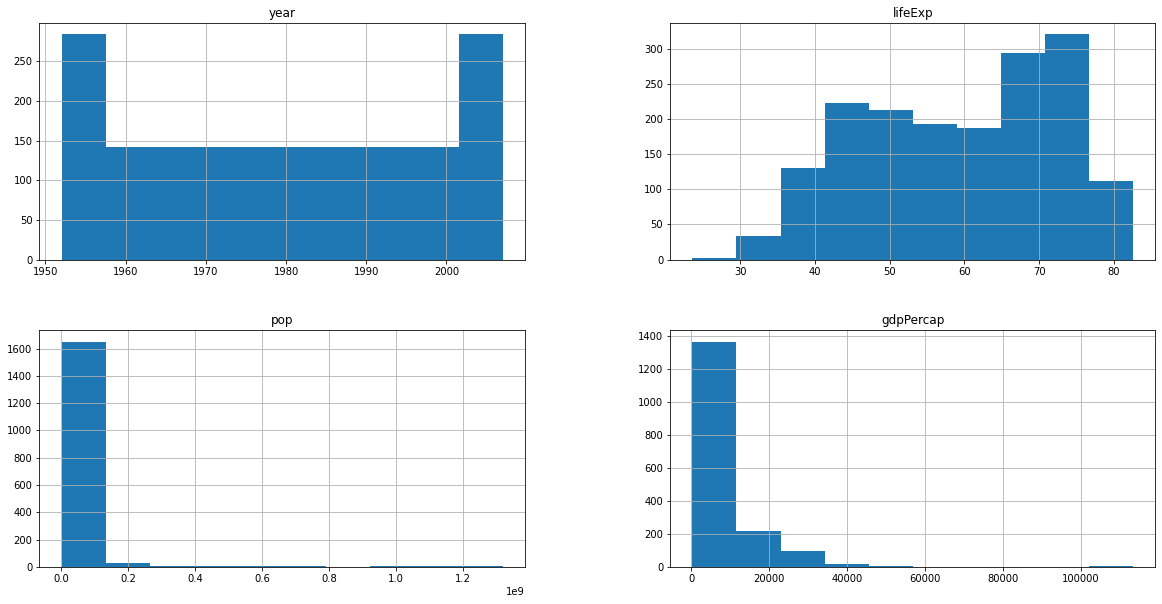

In [35]:
gm.hist(figsize=(20, 10));

### Question 1: Que pouvez-vous conclure à partir de ces histogrammes ?
Réponse:

**Année:** A priori il doit manquer des valeurs d'années pour certains pays.
**Espérance de vie:** On peut voir qu'elle est très variée selon les pays, mais qu'elle tend vers 75 ans en général
**Population:** On peut voir que la majorité des pays ont une petite population.
**PIB/hab.:** Malheureusement, nous constatons que la vaste majorité des pays ont un PIB bas, alors qu'un minuscule pourcentage a un haut PIB.

### Exercice 3

Trouvez combien d’observations il y a par pays (c.a.d., combien de données par année par pays) et vérifiez s’il y a des données manquantes.

In [38]:
#Nombre de données par pays pour toutes les année (12 données / pays)
gm.groupby('country').count().describe()

,continent,year,lifeExp,pop,gdpPercap
count,142.0,142.0,142.0,142.0,142.0
mean,12.0,12.0,12.0,12.0,12.0
std,0.0,0.0,0.0,0.0,0.0
min,12.0,12.0,12.0,12.0,12.0
25%,12.0,12.0,12.0,12.0,12.0
50%,12.0,12.0,12.0,12.0,12.0
75%,12.0,12.0,12.0,12.0,12.0
max,12.0,12.0,12.0,12.0,12.0


In [37]:
#Nombre de données par pays par année (1 donnée / année / pays)
gm.groupby(['country', 'year']).count().describe()

,continent,lifeExp,pop,gdpPercap
count,1704.0,1704.0,1704.0,1704.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0


In [40]:
#On peut voir que beaucoup de données d'années manquent, il n'y en a que 12
gm.groupby('year').count()

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,142,142,142,142,142
1957,142,142,142,142,142
1962,142,142,142,142,142
1967,142,142,142,142,142
1972,142,142,142,142,142
1977,142,142,142,142,142
1982,142,142,142,142,142
1987,142,142,142,142,142
1992,142,142,142,142,142


In [74]:
countries = gm['country'].unique().size
print(countries)
years = gm['year'].unique().size
print(years * countries)
#years = gm['year'].unique().count()
#print(countries * years)
#all_idxs = pd.MultiIndex.from_product([countries, range(years.min(), years.max())], names=['country', 'year'])
#missing_idxs = all_idxs.difference(gm.groupby(['country', 'year']).size().index)
#print(f'Nombre de données manquantes: {missing_idxs.shape[0]:,}')

142
1704


### Exercice 4

Listez les valeurs uniques présentes dans les colonnes ‘continent’, ‘country’, et ‘year’. p.ex. utilisez la méthode unique().

In [60]:
print(f"Continents: {gm['continent'].unique()}\n")
print(f"Pays: {gm['country'].unique()}\n")
print(f"Années: {gm['year'].unique()}")

Continents: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']

Pays: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius

### Exercice 5

Calculez la moyenne de l’espérance de vie de tous les pays en 1952 et en 2007. Générez un bar chart permettant la comparaison de ces moyennes.